In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
debit_optimiste_pyOpenRiverCam_df = pd.read_csv(R".\artifact\debit_optimiste_pyOpenRiverCam_df.csv")
debit_pessimiste_pyOpenRiverCam_df = pd.read_csv(R".\artifact\debit_pessimiste_pyOpenRiverCam_df.csv")

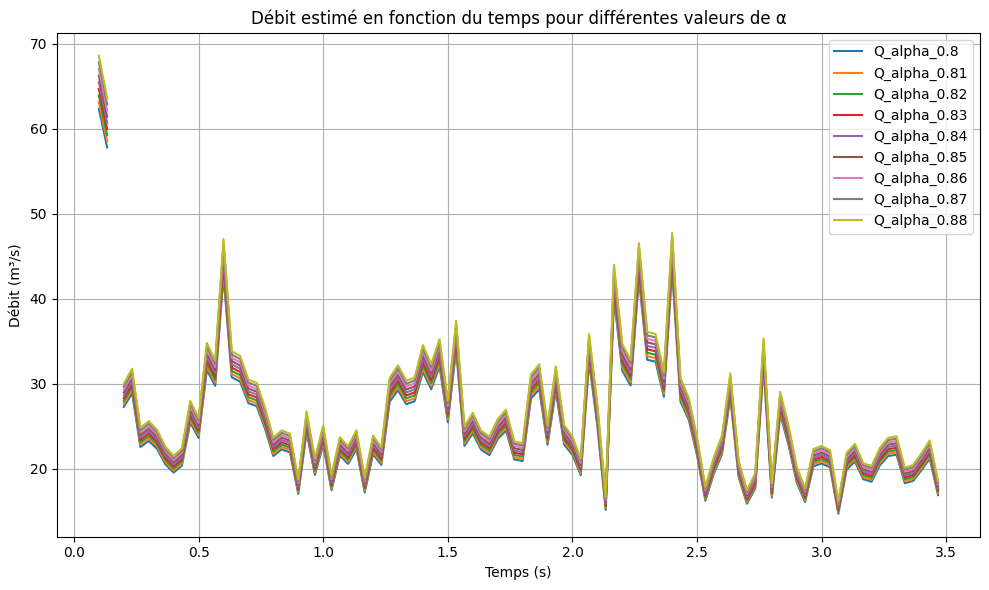

In [16]:
cols_q = [col for col in debit_optimiste_pyOpenRiverCam_df.columns if col.startswith("Q_alpha_")]

plt.figure(figsize=(10, 6))
for col in cols_q:
    plt.plot(debit_optimiste_pyOpenRiverCam_df["time_s"], debit_optimiste_pyOpenRiverCam_df[col], label=col)

plt.xlabel("Temps (s)")
plt.ylabel("Débit (m³/s)")
plt.title("Débit estimé en fonction du temps pour différentes valeurs de α")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

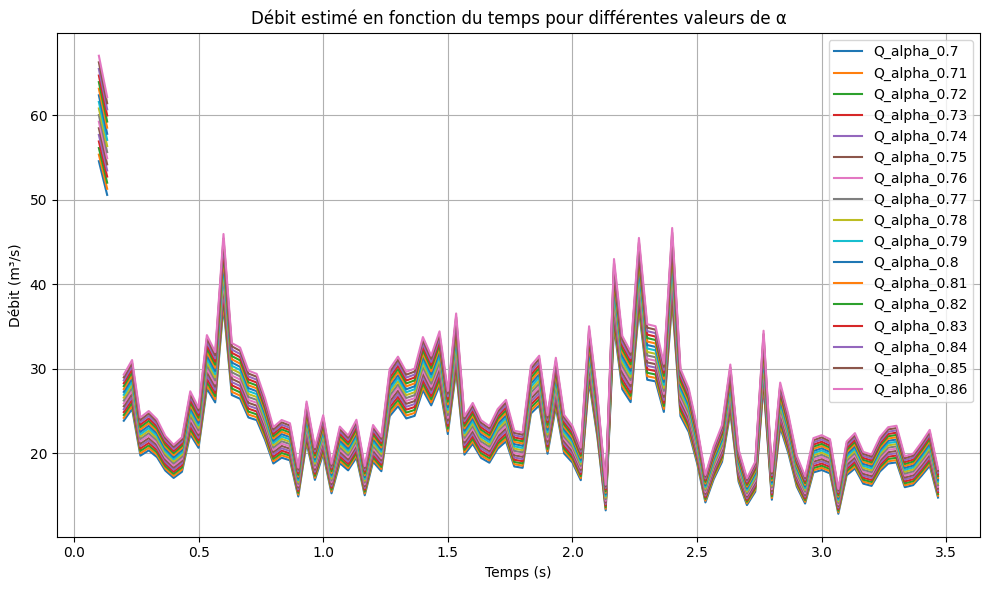

In [17]:
cols_q = [col for col in debit_pessimiste_pyOpenRiverCam_df.columns if col.startswith("Q_alpha_")]

plt.figure(figsize=(10, 6))
for col in cols_q:
    plt.plot(debit_pessimiste_pyOpenRiverCam_df["time_s"], debit_pessimiste_pyOpenRiverCam_df[col], label=col)

plt.xlabel("Temps (s)")
plt.ylabel("Débit (m³/s)")
plt.title("Débit estimé en fonction du temps pour différentes valeurs de α")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

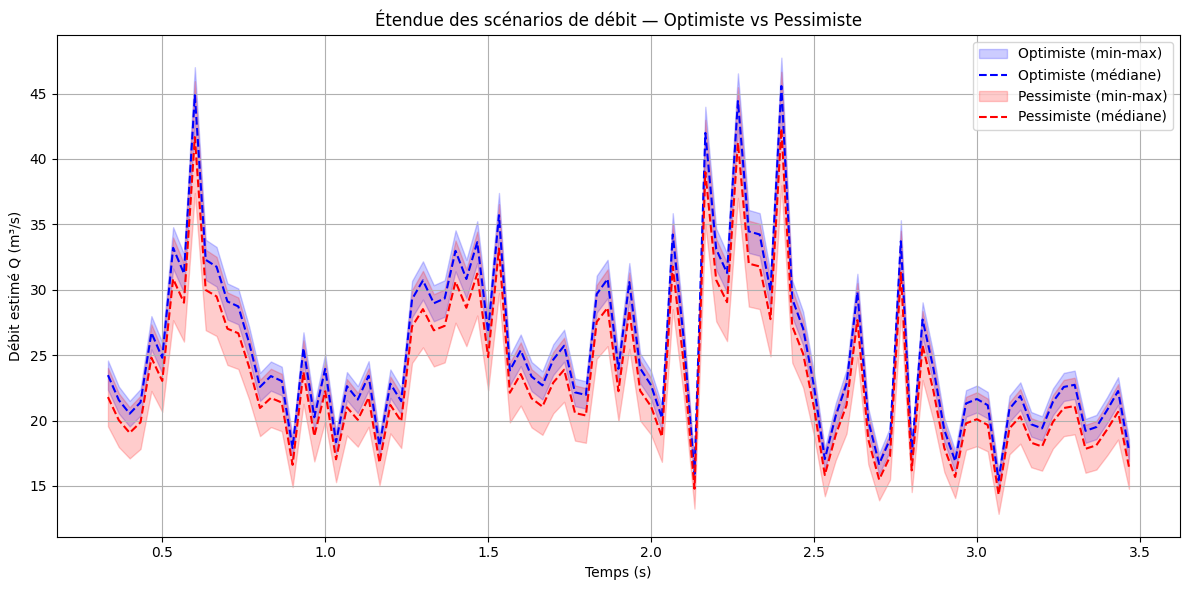

In [ ]:
time_s = debit_optimiste_pyOpenRiverCam_df["time_s"]

mask = debit_optimiste_pyOpenRiverCam_df["time_s"] > 0.3 #retrais car non représentatif
time_s = debit_optimiste_pyOpenRiverCam_df["time_s"][mask]

cols_opt = [col for col in debit_optimiste_pyOpenRiverCam_df.columns if col.startswith("Q_alpha_")]
cols_pess = [col for col in debit_pessimiste_pyOpenRiverCam_df.columns if col.startswith("Q_alpha_")]

q_opt_min = debit_optimiste_pyOpenRiverCam_df[cols_opt][mask].min(axis=1)
q_opt_max = debit_optimiste_pyOpenRiverCam_df[cols_opt][mask].max(axis=1)
q_opt_med = debit_optimiste_pyOpenRiverCam_df[cols_opt][mask].median(axis=1)

q_pess_min = debit_pessimiste_pyOpenRiverCam_df[cols_pess][mask].min(axis=1)
q_pess_max = debit_pessimiste_pyOpenRiverCam_df[cols_pess][mask].max(axis=1)
q_pess_med = debit_pessimiste_pyOpenRiverCam_df[cols_pess][mask].median(axis=1)

plt.figure(figsize=(12, 6))

# Enveloppe optimiste
plt.fill_between(time_s, q_opt_min, q_opt_max, color="blue", alpha=0.2, label="Optimiste (min-max)")
plt.plot(time_s, q_opt_med, color="blue", linestyle="--", label="Optimiste (médiane)")

# Enveloppe pessimiste
plt.fill_between(time_s, q_pess_min, q_pess_max, color="red", alpha=0.2, label="Pessimiste (min-max)")
plt.plot(time_s, q_pess_med, color="red", linestyle="--", label="Pessimiste (médiane)")

# Mise en forme
plt.xlabel("Temps (s)")
plt.ylabel("Débit estimé Q (m³/s)")
plt.title("Étendue des scénarios de débit — Optimiste vs Pessimiste")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
